# Simulate Random Game

<div class="alert alert-block alert-info">
<b>Imports:</b> Import all of the classes and useful functions for game initialization
</div>

In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Initialization:</b> Initialize the Game of Risk using the functions from map_setup_functions.py. Our team names are "red" and "blue", and they will randomly split the countries on the RISK map. Each territory will only start with 1 troop. In addition, we call the RandomStrategy subclass to tell each team that they will play using a RandomStrategy!
</div>


In [3]:
full_risk_map = initializeFullRiskMap()
team_names = ["red", "blue"]
team_strategies = [RuleOfThumbStrategy, RandomStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

<div class="alert alert-block alert-warning">
<b>Territories: </b> Let us see what our kind of territories our teams have 
</div>

In [4]:
teams[0].getTerritories()[0:5]

['Congo', 'Northern Europe', 'Western Europe', 'Western Australia', 'Peru']

<div class="alert alert-block alert-warning">
<b>Adding Troops: </b> What happens if we add a troop to the first teams first territory? We will see that the RISK Map updates that country with one more troop! 
</div>

In [5]:
#teams[0].addTroops(teams[0].getTerritories()[0], 1)
#print('{territory} now has {x} troops!'.format(territory = teams[0].getTerritories()[0], x = risk_map.getTroops(teams[0].getTerritories()[0])))

<div class="alert alert-block alert-warning">
    <b>Get Next Move: </b> Now, only one territory has more than 1 troop, so that will be the only territory that can make a next move (even in a random strategy!). This calls the strategy asking what move it should make. If getNextMove() returns nothing, that means that the territory is completely surrounded by its own team. Try adding troops to another country.
</div>

In [6]:
#teams[0].getStrategy().addTroopsTurn(3)
#teams[0].getNextMove()

<div class="alert alert-block alert-warning">
<b>Determine and Make Next Move: </b> This will call the strategies getNextMove() function and make that move (including the actual attack!)
</div>

In [7]:
#teams[0].determineAndMakeMove()

<div class="alert alert-block alert-warning">
<b>Play Turn: </b> This plays a complete turn (of potentailly multiple moves) according to a country's Strategy! 
</div>

In [8]:
#teams[0].playTurn()

<div class="alert alert-block alert-warning">
<b>Simulate Game: </b> This simulates a complete game between a Rule of Thumb Strategy and Random Strategy!
</div>

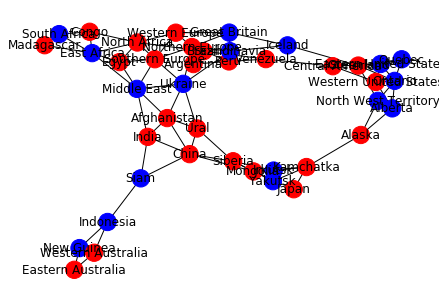

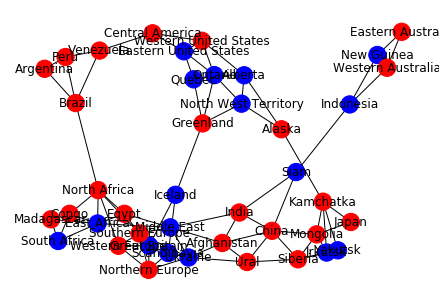

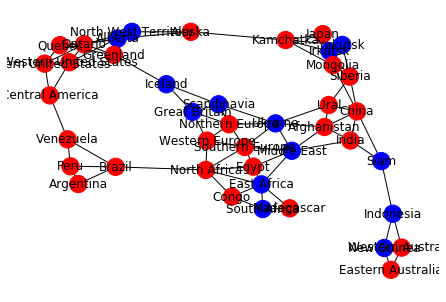

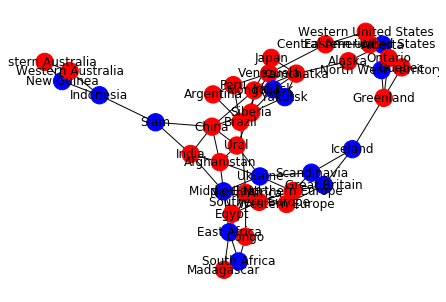

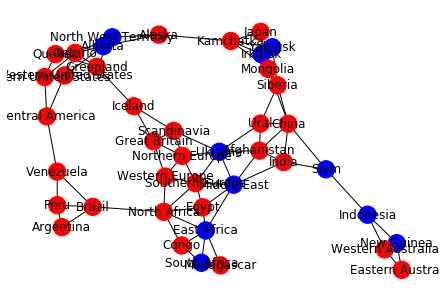

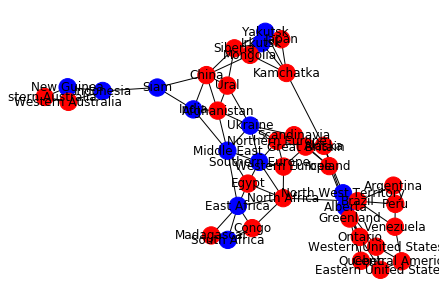

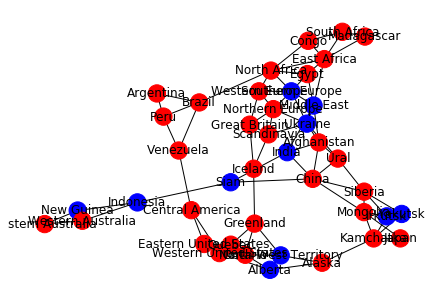

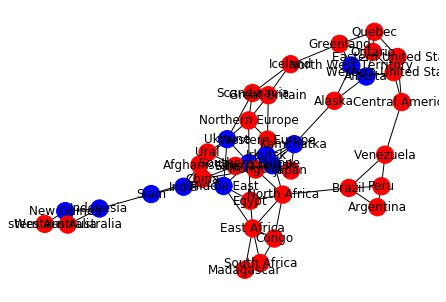

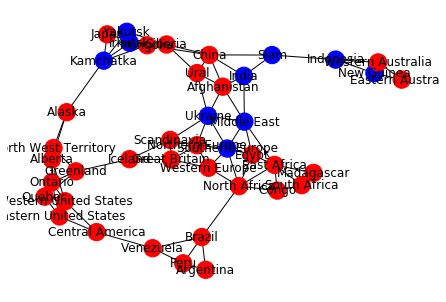

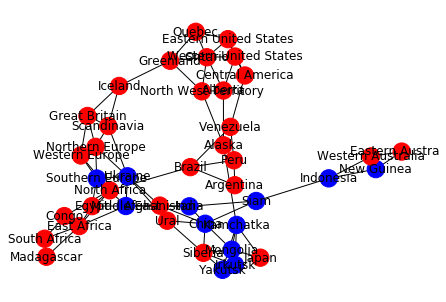

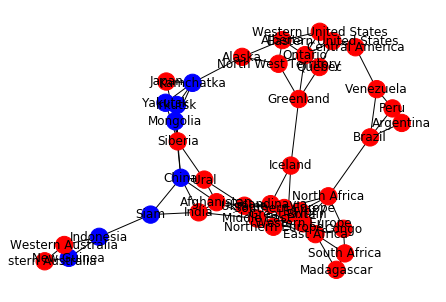

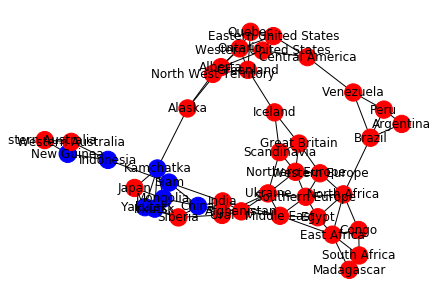

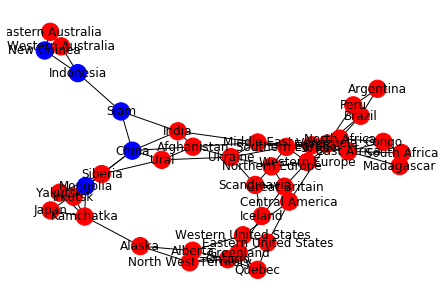

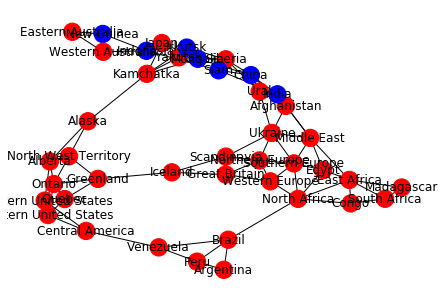

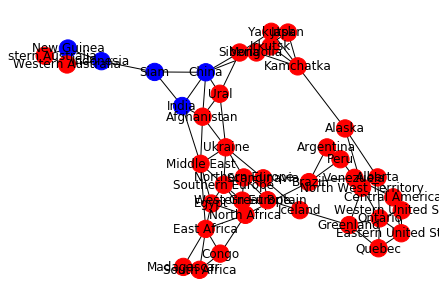

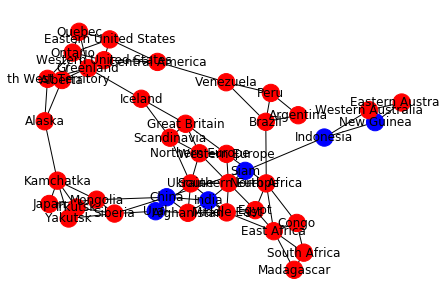

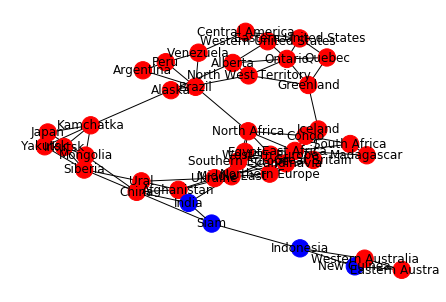

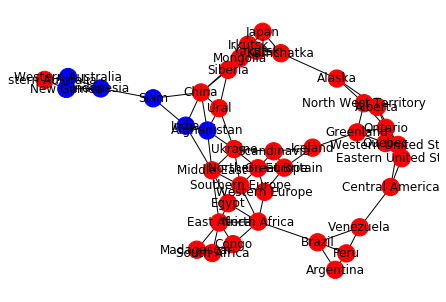

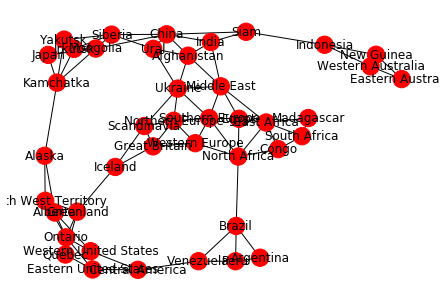

red team has won in 9 turns


In [9]:
curr_team = teams[0]
defending_team = teams[1]
counter = 0
while defending_team.hasTeamWon() == False:
    curr_team.playTurn()
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, with_labels=True)
    plt.show()
    counter += 1
    
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [10]:
import networkx as nx

In [11]:
#